# **Sentiment Analysis of Electric Cars on TikTok**

**By Rakha Abigael**

https://linkedin.com/in/rakhaabigael

rkhabigael@gmail.com

# **Project Overview**

**With the rising discourse around sustainable transportation, understanding public sentiment toward electric vehicles is crucial. This project explores how TikTok, as a major platform for public opinion in Indonesia, reflects user sentiment about electric cars. Machine learning models were used to classify these sentiments, helping to uncover key public perceptions that may influence EV adoption.**

# **IMPORT PACKAGE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install openpyxl
!pip install scikit-learn
!pip install nltk
!pip install Sastrawi
!pip install matplotlib
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import matplotlib.pyplot as plt

# **EDA**

In [ ]:
#display type 1
import pandas as pd

# Specify the path to your CSV file
file_path = f"/content/drive/MyDrive/SKRIPSI/Data/V1 Pakar Dataset TikTok EV.xlsx"

df = pd.read_excel(file_path)

# Display the DataFrame
display(df)

,e1g2efjf5 href,css-1zpj2q-ImgAvatar src,css-1665s4c-SpanUserNameText,css-xm2h10-PCommentText,css-1esugaz-SpanCreatedTime,css-gb2mrc-SpanCount,css-16xv7y2-PReplyActionText,e1g2efjf5 href 2,css-1zpj2q-ImgAvatar src 2,e1g2efjf4,...,css-xm2h10-PCommentText 2,css-1esugaz-SpanCreatedTime 2,css-gb2mrc-SpanCount 2,css-qjy3k4-SpanReplyButton 2,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.tiktok.com/@imnot.iyoo,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,Marrlz | 𝕸𝖎𝖈𝖈,cuan terus cuannya di pake buat benerin lingku...,2023-11-14,288,Lihat 40 balasan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.tiktok.com/@jopi.mao,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,BG aris,lah gw tinggal di Halmahera 🗿,2-12,7,Lihat 6 balasan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.tiktok.com/@bulu7.82,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,blum ada bulu,anjay daerah gw tuh,2-5,6,Lihat 9 lainnya,https://www.tiktok.com/@aksikitaindonesia,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,·,...,gimana nih kondisi terkini disana?👀,2-6,2,Jawab,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.tiktok.com/@rezagbl,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,zan ART⚡,guwah sih lingkungan bang dari padq cuan,2023-11-13,29,Lihat 4 lainnya,https://www.tiktok.com/@aksikitaindonesia,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,·,...,kenapa tuh? 👀🍃,2023-11-13,4,Jawab,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.tiktok.com/@marvelcucusaputra,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,marvel,gua pilih lingkungan aja bg,2-5,9,Lihat 2 lainnya,https://www.tiktok.com/@aksikitaindonesia,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,·,...,kenapa nihh?😁,2-6,1,Jawab,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,https://www.tiktok.com/@batikradalseruti,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,irmatsamdo,orang tuh kalo mau berpendapat harus dr semua ...,11-21,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2259,https://www.tiktok.com/@purpurwadi17,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,wadi 76,purna jualnya ancur pk,11-21,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2260,https://www.tiktok.com/@benokreatif,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,Beno,nunggu mobil berbahan bakar nuklir aja deh 😆,11-21,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2261,https://www.tiktok.com/@amsir28,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,Amsir,"Ganti saja semua biar polusi dijalan hilang, p...",11-21,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cek jumlah data yang didapatkan
num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 2263.


In [ ]:
# rename two of the columns by useing `rename` method
df.rename(columns={'css-xm2h10-PCommentText': 'full_text', 'css-1665s4c-SpanUserNameText': 'username'}, inplace=True)
df.head()

,e1g2efjf5 href,css-1zpj2q-ImgAvatar src,username,full_text,css-1esugaz-SpanCreatedTime,css-gb2mrc-SpanCount,css-16xv7y2-PReplyActionText,e1g2efjf5 href 2,css-1zpj2q-ImgAvatar src 2,e1g2efjf4,...,css-xm2h10-PCommentText 2,css-1esugaz-SpanCreatedTime 2,css-gb2mrc-SpanCount 2,css-qjy3k4-SpanReplyButton 2,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.tiktok.com/@imnot.iyoo,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,Marrlz | 𝕸𝖎𝖈𝖈,cuan terus cuannya di pake buat benerin lingku...,2023-11-14,288,Lihat 40 balasan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.tiktok.com/@jopi.mao,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,BG aris,lah gw tinggal di Halmahera 🗿,2-12,7,Lihat 6 balasan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.tiktok.com/@bulu7.82,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,blum ada bulu,anjay daerah gw tuh,2-5,6,Lihat 9 lainnya,https://www.tiktok.com/@aksikitaindonesia,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,·,...,gimana nih kondisi terkini disana?👀,2-6,2,Jawab,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.tiktok.com/@rezagbl,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,zan ART⚡,guwah sih lingkungan bang dari padq cuan,2023-11-13,29,Lihat 4 lainnya,https://www.tiktok.com/@aksikitaindonesia,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,·,...,kenapa tuh? 👀🍃,2023-11-13,4,Jawab,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.tiktok.com/@marvelcucusaputra,https://p16-sign-sg.tiktokcdn.com/aweme/100x10...,marvel,gua pilih lingkungan aja bg,2-5,9,Lihat 2 lainnya,https://www.tiktok.com/@aksikitaindonesia,https://p16-sign-useast2a.tiktokcdn.com/tos-us...,·,...,kenapa nihh?😁,2-6,1,Jawab,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['full_text','username']]
df

,full_text,username
0,cuan terus cuannya di pake buat benerin lingku...,Marrlz | 𝕸𝖎𝖈𝖈
1,lah gw tinggal di Halmahera 🗿,BG aris
2,anjay daerah gw tuh,blum ada bulu
3,guwah sih lingkungan bang dari padq cuan,zan ART⚡
4,gua pilih lingkungan aja bg,marvel
...,...,...
2258,orang tuh kalo mau berpendapat harus dr semua ...,irmatsamdo
2259,purna jualnya ancur pk,wadi 76
2260,nunggu mobil berbahan bakar nuklir aja deh 😆,Beno
2261,"Ganti saja semua biar polusi dijalan hilang, p...",Amsir


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  2260 non-null   object
 1   username   2263 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB


In [ ]:
jumlah_data = len(df)
jumlah_baris, jumlah_kolom = df.shape
missing_value = df.isnull().sum()
data_duplikat = df.duplicated().sum()
presentase_data_dihapus = (data_duplikat / jumlah_data) * 100

print('total data : ',jumlah_data)
print('jumlah baris : ',jumlah_baris,', jumlah kolom : ',jumlah_kolom)
print('jumlah missing value : ')
print(missing_value)
print('jumlah data duplikat = ',data_duplikat)
print('===================================')
jumlah_total_data_sebelum = df.shape[0]
print('total data sebelum dihapus = ', jumlah_total_data_sebelum)
print('===================================')
# Menampilkan frekuensi kemunculan setiap username
username_counts = df['username'].value_counts()

# Filter untuk username yang memberikan komentar lebih dari sekali
noisy_usernames = username_counts[username_counts > 1]

print("Username yang memberikan komentar lebih dari sekali:")
print(noisy_usernames)
print('===================================')
output = '/content/drive/MyDrive/SKRIPSI/BARU/Data Kotor.xlsx'
df.to_excel(output, index=False)
print('data berhasil disimpan di ',output)

total data :  2263
jumlah baris :  2263 , jumlah kolom :  2
jumlah missing value : 
full_text    3
username     0
dtype: int64
jumlah data duplikat =  6
total data sebelum dihapus =  2263
Username yang memberikan komentar lebih dari sekali:
username
R                      4
istighfar              4
Anton Wijaya           4
aksikitaindonesia      3
Liputan Kuliner        3
Beliau                 3
Kurniawan              3
Karsono                3
Lone Wolf              3
aku repot              3
bro                    3
Jakarta999             2
sugi_cahcilongkrang    2
.                      2
Roqyl Janan alwafi     2
bedjo tenan            2
RUBI ANTO              2
Putri07 💜🇲🇨            2
BULLS☑️                2
kangRebahan            2
ramdoni                2
niki miko johny007     2
Samudramanthana        2
ketimunstoner          2
matrix1230EZE          2
Balena                 2
kidemang               2
kokogps                2
Asland                 2
andre firmansyah       2


# **PRE-PROCESSING DATA**

###CLEANING DATA

In [ ]:
# Pembersihan Text
df.dropna(inplace=True)  # Hapus baris yang memiliki nilai null

# Hapus baris kosong
df.dropna(subset=['full_text'], inplace=True)

# Hapus kolom kosong
df.dropna(axis=1, how='all', inplace=True)

# Hapus duplikasi data
df.drop_duplicates(subset=['full_text'], inplace=True)

df.drop_duplicates(inplace=True)

# Tampilkan Jumlah Total Data Setelah Pembersihan
jumlah_total_data_setelah = len(df.index)
print("=====================================================================")
print("Jumlah Total Data Setelah Pembersihan:", jumlah_total_data_setelah)

Jumlah Total Data Setelah Pembersihan: 2192


In [ ]:
df
#df.loc[1970:2143, ['username', 'full_text']]

,full_text,username
0,cuan terus cuannya di pake buat benerin lingku...,Marrlz | 𝕸𝖎𝖈𝖈
1,lah gw tinggal di Halmahera 🗿,BG aris
2,anjay daerah gw tuh,blum ada bulu
3,guwah sih lingkungan bang dari padq cuan,zan ART⚡
4,gua pilih lingkungan aja bg,marvel
...,...,...
2258,orang tuh kalo mau berpendapat harus dr semua ...,irmatsamdo
2259,purna jualnya ancur pk,wadi 76
2260,nunggu mobil berbahan bakar nuklir aja deh 😆,Beno
2261,"Ganti saja semua biar polusi dijalan hilang, p...",Amsir


###TEXT PRE-PROCESSING (LOWERCASE)

In [ ]:
df['full_text'] = df['full_text'].str.lower()
#df
#df.loc[1870:1970, ['username', 'full_text']]

###TEXT PRE-PROCESSING (DELETE SYMBOL, EMOJI, URL, ETC)

In [ ]:
# Pembersihan Text
df.dropna(inplace=True)  # Hapus baris yang memiliki nilai null

# Bersihkan simbol, angka, url
df['full_text'] = df['full_text'].str.replace('[^a-zA-Z\s]', '', regex=True)
df['full_text'] = df['full_text'].str.replace('\d+', '', regex=True)
df['full_text'] = df['full_text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

# Hapus baris kosong
df.dropna(subset=['full_text'], inplace=True)

# Hapus kolom kosong
df.dropna(axis=1, how='all', inplace=True)

# Hapus duplikasi data
df.drop_duplicates(subset=['full_text'], inplace=True)
df.drop_duplicates(inplace=True)

# Tampilkan Jumlah Total Data Setelah Pembersihan
jumlah_total_data_setelah = len(df.index)
print("=====================================================================")
print("Jumlah Total Data Setelah Pembersihan:", jumlah_total_data_setelah)

output = '/content/drive/MyDrive/SKRIPSI/BARU/Data Bersih.xlsx'
df.to_excel(output, index=False)
print('data berhasil disimpan di ',output)

Jumlah Total Data Setelah Pembersihan: 2143
data berhasil disimpan di  /content/drive/MyDrive/SKRIPSI/BARU/Data Bersih.xlsx


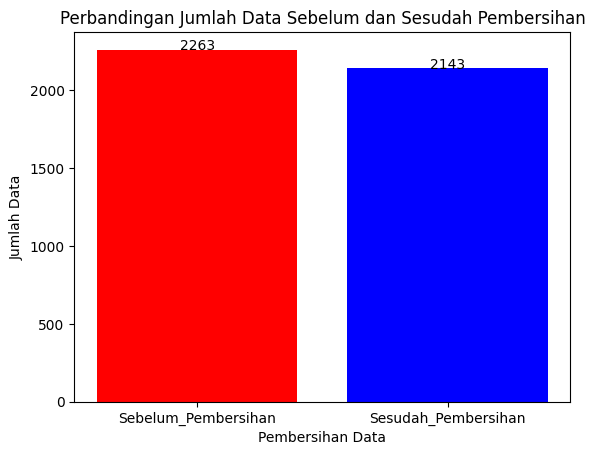

In [ ]:
1# Data untuk barplot
labels = ['Sebelum_Pembersihan', 'Sesudah_Pembersihan']
jumlah_data = [jumlah_total_data_sebelum, jumlah_total_data_setelah]

#Membuat barplot
plt.bar(labels, jumlah_data, color=['red', 'blue'])

#Menambahkan teks jumlah data pada setiap bar
for i in range(len(jumlah_data)):
  plt.text(i, jumlah_data[i], jumlah_data[i], ha ='center')

plt.xlabel('Pembersihan Data')
plt.ylabel('Jumlah Data')
plt.title('Perbandingan Jumlah Data Sebelum dan Sesudah Pembersihan')
plt.show()

In [ ]:
# setelah cleaning missing data dan data duplicates
print('Missing value:')
print(df.isnull().sum())

print('\nData duplikat :')
print(df.duplicated().sum())

print('\nData duplikat comment:')
print(df.duplicated(subset=['full_text']).sum())

Missing value:
full_text    0
username     0
dtype: int64

Data duplikat :
0

Data duplikat comment:
0


In [ ]:
# Pembersihan Text
df.dropna(inplace=True)  # Hapus baris yang memiliki nilai null

# Hapus baris kosong
df.dropna(subset=['full_text'], inplace=True)

# Hapus kolom kosong
df.dropna(axis=1, how='all', inplace=True)

# Hapus duplikasi data
df.drop_duplicates(subset=['full_text'], inplace=True)

df.drop_duplicates(inplace=True)

# Tampilkan Jumlah Total Data Setelah Pembersihan
jumlah_total_data_setelah = len(df.index)
print("=====================================================================")
print("Jumlah Total Data Setelah Pembersihan:", jumlah_total_data_setelah)

Jumlah Total Data Setelah Pembersihan: 2143


In [ ]:
df

,full_text,username
0,cuan terus cuannya di pake buat benerin lingku...,Marrlz | 𝕸𝖎𝖈𝖈
1,lah gw tinggal di halmahera,BG aris
2,anjay daerah gw tuh,blum ada bulu
3,guwah sih lingkungan bang dari padq cuan,zan ART⚡
4,gua pilih lingkungan aja bg,marvel
...,...,...
2258,orang tuh kalo mau berpendapat harus dr semua ...,irmatsamdo
2259,purna jualnya ancur pk,wadi 76
2260,nunggu mobil berbahan bakar nuklir aja deh,Beno
2261,ganti saja semua biar polusi dijalan hilang pa...,Amsir


# **PROCESSING DATA**

### STEMMING

In [ ]:
#stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada teks
def stem_text(text):
    return stemmer.stem(text)

# Lakukan stemming pada kolom 'Text'
df['full_text'] = df['full_text'].apply(stem_text)

# Menyimpan hasil stemming data ke dalam file Excel
output_path_stem = "/content/drive/MyDrive/SKRIPSI/BARU/Data Stemming.xlsx"
df.to_excel(output_path_stem, index=False)
print("\nData berhasil disimpan di:", output_path_stem)

In [ ]:
df

###TOKENIZATION

In [ ]:
#tokenisasi
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize_text(text):
  return word_tokenize(text)

# Lakukan tokenisasi pada kolom 'Text'
df['full_text'] = df['full_text'].apply(tokenize_text)

# Menyimpan hasil tokenisasi data ke dalam file Excel
output_path_token = "/content/drive/MyDrive/SKRIPSI/BARU/Data Tokenisasi.xlsx"
df.to_excel(output_path_token, index=False)
print("\nData berhasil disimpan di:", output_path_token)

In [ ]:
df

###STOPWORD REMOVAL

In [ ]:
# Daftar stopwords tambahan
stopwords_to_remove =  [
    'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'bagi',
    'bahkan', 'dan', 'dengan', 'yang', 'yg', 'di', 'kok', 'ya', 'lh', 'si',
    'mah', 'lah', 'itu', 'sih', 'lahh', 'nya', 'aja', 'ada', 'iya', 'tuh',
    'd', 'dah', 'dgn', 'mbl', 'tuk', 'dl', 'eh', 'zeekr', 'zi', 'prabowo',
    'gibran', 'jokowi', 'ommobi', 'laaa', 'puan', 'b', 'a', 'an', 'faniyyy',
    'ff', 'vian', 'gibrann', 'anis', 'megawati', 'ivan', 'kensira', 'rania',
    'naruto', 'sahil', 'dn', 'bernadya', 'gunawan', 'memindahkanyg', 'bkan',
    'punyajdi', 'jawa', 'ngasih', 'ms', 'adl', 'ente', 'awd', 'jgn', 'sany',
    'saya', 'tidak', 'tp', 'trus', 'dong', 'g', 'deh', 'nih', 'sj', 'sy',
    'ny', 'bang', 'bg', 'om', 'yah', 'istri', 'sabtu','fyp', 'nokia', 'cina',
    'kek', 'mampang', 'main', 'vale', 'epep', 'iwip','m','rakipanda','knock',
    'nenek','klu','jt','apple','sii', 'ud', 'ikan','pk','sya','kebyang','pakklo','dr',
    'syaa','dlu','koq','facewithrollingeyes','bosa',

]

# Path ke file stopwords tambahan
file_stopwords_path = "/content/drive/MyDrive/SKRIPSI/BARU/id.stopwords.02.01.2016.txt"

# Membaca stopwords dari file
with open(file_stopwords_path, 'r', encoding='utf-8') as file:
    file_stopwords = file.read().splitlines()

# Gabungkan stopwords dari string dan file
stopwords_to_remove = set(stopwords_to_remove + file_stopwords)

# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stopwords_to_remove]

# Menerapkan fungsi pada kolom 'full_text'
df['full_text'] = df['full_text'].apply(remove_stopwords)

# Menghapus baris dengan nilai kosong
df = df.dropna()

# Menghapus baris yang hanya berisi []
df = df[df['full_text'].map(lambda d: len(d)) > 0]

# Menyimpan hasil ke dalam file Excel
output_path_clean = "/content/drive/MyDrive/SKRIPSI/BARU/Data Stopword Removal.xlsx"
df.to_excel(output_path_clean, index=False)
print("\nData berhasil disimpan di:", output_path_clean)
print(df)

###NORMALIZATION

In [ ]:
# Kamus untuk normalisasi kata
normalization_dict = {
    'cuaan': 'cuan',
    'cuannya': 'cuan',
    'cuuaaan':'cuan',
    'cuna':'cuan',
    'cuaaaann':'cuan',
    'cuanlah':'cuan',
    'gua': 'saya',
    'gw':'saya',
    'guwah': 'saya',
    'aku':'saya',
    'iyaa':'iya',
    'iyaaa':'iya',
    'iyaaaa':'iya',
    'iyaaaaa':'iya',
    'gak':'tidak',
    'gk':'tidak',
    'ga':'tidak',
    'ngak':'tidak',
    'lingkung':'lingkungan',
    'lingkuggan':'lingkungan',
    'linkinggan':'lingkungan',
    'lingkungn':'lingkungan',
    'likungan':'lingkungan',
    'likugan':'lingkungan',
    'libgkunan':'lingkungan',
    'ingkunagn':'lingkungan',
    'ingkunan':'lingkungan',
    'lingky':'lingkungan',
    'lukungan':'lingkungan',
    'linkungan':'lingkungan',
    'batre': 'baterai',  # data normalisasi tambahan
    'batere': 'baterai',  # data normalisasi tambahan
    'batrenya': 'baterai',  # data normalisasi tambahan
    'baterenya': 'baterai',  # data normalisasi tambahan
    'battery': 'baterai',  # data normalisasi tambahan
    'batery': 'baterai',  # data normalisasi tambahan
    'batree': 'baterai',  # data normalisasi tambahan
    'batterai': 'baterai',  # data normalisasi tambahan
    'batrei': 'baterai',  # data normalisasi tambahan
    'batteray': 'baterai',  # data normalisasi tambahan
    'batrey': 'baterai',  # data normalisasi tambahan
    'bateraynya': 'baterai',  # data normalisasi tambahan
    'baterey': 'baterai',  # data normalisasi tambahan
    'baterynya':'baterai',# data normalisasi tambahan
    'pake':'pakai',
    'klo':'kalau',
    'kendara':'kendaraan',
    'jg':'juga',
    'lg':'lagi',
    'utk':'untuk',
    'udh':'sudah',
    'udah':'sudah',
    'indo':'indonesia',
    'bgt':'banget',
    'jd':'jadi',
    'jdi':'jadi',
    'km':'kamu',
    'elu':'kamu',
    'brp':'berapa',
    'aplg':'apalagi',
    'usia':'umur',
    'nnt':'nanti',
    'blg':'bilang',
    'gapain':'ngapain',
    'kepebtingan':'kepentingan',
    'cman':'cuman',
    'ernergi':'energi',
    'ngechargenya':'cas',
    'ntr':'nanti',
    'untungin':'untung',
    'pdhl':'padahal',
    'mnding':'mending',
    'padq':'pada',
    'ribeeeetbrooo':'ribet',
    'dpt':'dapat',
    'dapet':'dapat',
    'krn':'karena',
    'karna':'karena',
    'krna':'karena',
    'kalo':'kalau',
    'jga':'juga',
    'sma':'sama',
    'dapetin':'dapat',
    'kaga':'tidak',
    'ngk':'tidak',
    'tdk':'tidak',
    'pakek':'pakai',
    'pke':'pakai',
    'gmn':'gimana',
    'cuman':'cuma',
    'bisr':'bisa',
    'bissa':'bisa',
    'jadiin':'jadikan',
    'seberpa':'seberapa',
    'ttp':'tetap',
    'tpi':'tapi',
    'kpan': 'kapan',
    'abis':'habis',
    'klw':'kalau',
    'mosin':'mesin',
    'udeh':'sudah',
    'semu':'semua',
    'lustrik':'listrik',
    'trbuang':'terbuang',
    'ngecasny':'cas',
    'msh':'masih',
    'smw':'semua',
    'icara':'bicara',
    'murahbnya':'murah',
    'polusitpi':'polusi',
    'nanjakklo':'nanjak',
    'mbl':'mobil',
    'haega':'harga',
    'olie':'oli',
    'setujutapi':'setuju',
    'kerennnnn':'keren',
    'kereennn':'keren',
    'muuraahh':'murah',
    'wul':'wuling',
    'ing':'wuling',
    'murahlahhh':'murah',
    'bahayaaa':'bahaya',
    'mbengkak':'bengkak',
    'bensinnn':'bensin',
    'jebolll':'jebol',
    'jeboollll':'jebol',
    'mehong':'mahal',
    'maauuuu':'mau',
    'naek':'naik',
    'idam':'idaman',
    'idamann':'idaman',
    'lamaa':'lama',
}

def normalize_words(tokens):
    return [normalization_dict.get(word, word) for word in tokens]

# Apply normalize_words function to 'full_text' column
df['full_text'] = df['full_text'].apply(normalize_words)

# Menyimpan hasil normalisasi ke dalam file Excel
output_path_normalized = "/content/drive/MyDrive/SKRIPSI/BARU/Data Normalisasi.xlsx"
df.to_excel(output_path_normalized, index=False)

print("\nData normalisasi berhasil disimpan di:", output_path_normalized)
print(df)

###VISUALIZATION

In [ ]:
# Pembersihan Text
df.dropna(inplace=True)  # Hapus baris yang memiliki nilai null

# Hapus baris kosong
df.dropna(subset=['full_text'], inplace=True)

# Hapus kolom kosong
df.dropna(axis=1, how='all', inplace=True)

# Hapus duplikasi data
df.drop_duplicates(subset=['full_text'], inplace=True)

# df.drop_duplicates(inplace=True)

# Tampilkan Jumlah Total Data Setelah Pembersihan
jumlah_total_data_setelah = len(df.index)
print("=====================================================================")
print("Jumlah Total Data Setelah Pembersihan:", jumlah_total_data_setelah)

In [ ]:
#Hitung frekuensi setiap kata
from collections import Counter
word_freq = Counter([word for text in df['full_text'] for word in text])

for word, freq in word_freq.most_common(10):
  print(f'kata: {word}, Frekuensi: {freq}')

#Menyimpan hasil stopword removal data ke dalam DataFrame
result_df = pd.DataFrame({"Kata": [word for word, _ in word_freq.most_common()],
                          "Frekuensi": [freq for _, freq in word_freq.most_common()]})

# Menyimpan hasil ke dalam file Excel
output_path_freq = "/content/drive/MyDrive/SKRIPSI/BARU/Frekuensi Kata.xlsx"
result_df.to_excel(output_path_freq, index=False)
print("\nData berhasil disimpan di:", output_path_freq)

#Hitung frekuensi setiap kata
word_freq = Counter([word for text in df['full_text'] for word in text])

#Ambil 10 kata dengan frekuensi tertinggi
most_common_words = word_freq.most_common(10)

#Buat list untuk label dan frekuensi
labels, freq = zip(*most_common_words)

#Buat array warna acak
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

#Buat barplot horizontal dengan warna acak
plt.barh(labels, freq, color=colors)
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('10 Kata dengan Frekuensi Tertinggi')
plt.gca().invert_yaxis() # Balik urutan label di sumbu y
plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

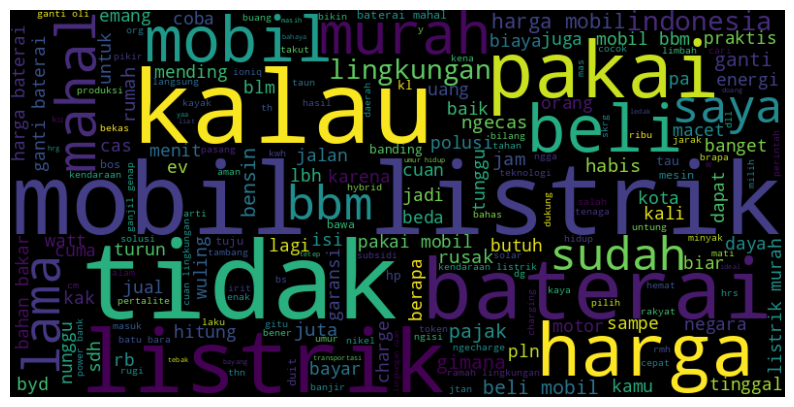

In [ ]:
#workcloud
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
# Gabungkan semua teks menjadi satu string
all_text = ' '.join([' '.join(text) for text in df['full_text']])

# Buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

# Tampilkan wordcloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [ ]:
import itertools
import networkx as nx

#Membuat list pasangan kata
pairs_list = [list(itertools.combinations (tokens_list, 2)) for tokens_list in df[ 'full_text']]
pairs = [pair for pairs in pairs_list for pair in pairs]

#Menghitung frekuensi pasangan kata
pair_freq = Counter(pairs)

#Menyimpan hasil keterkaitan kata ke dalam DataFrame
keterkaitan_df = pd.DataFrame(list(pair_freq.items()), columns=['Pasangan Kata', 'Frekuensi'])
keterkaitan_df.to_excel('/content/drive/MyDrive/SKRIPSI/BARU/Keterkaitan Kata.xlsx',index=False)

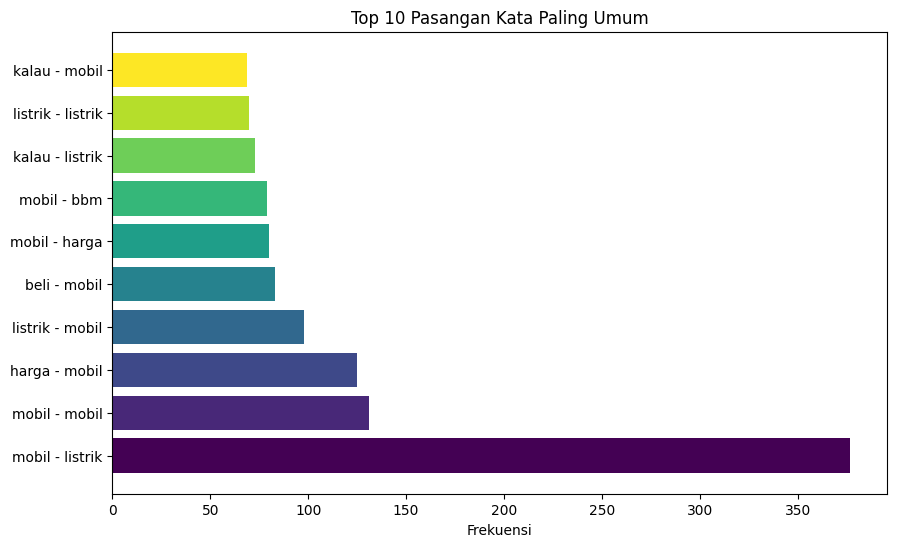

In [ ]:
#Horizontal Bar Plot untuk Keterkaitan Kata
common_pairs = pair_freq.most_common(10) #Ambil 10 pasangan kata paling umum
pairs, frequencies = zip(*common_pairs)

#Ubah pasangan kata menjadi string
pairs = [' - '.join(pair) for pair in pairs]

#Buat array warna acak
colors = plt.cm.viridis (np.linspace(0, 1, len(pairs)))

plt.figure(figsize=(10, 6))
plt.barh(pairs, frequencies, color=colors)
plt.xlabel('Frekuensi')
plt.title('Top 10 Pasangan Kata Paling Umum')

plt.show()

# **LABELLING**

In [ ]:
# Mengubah list menjadi string
df['full_text'] = df['full_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

output_path_score_counts = "/content/drive/MyDrive/SKRIPSI/BARU/data_temp.xlsx"
df.to_excel(output_path_score_counts)
df

,full_text,username
0,cuan cuan pakai benerin lingkungan,Marrlz | 𝕸𝖎𝖈𝖈
1,saya tinggal halmahera,BG aris
2,anjay daerah saya,blum ada bulu
3,saya lingkungan pada cuan,zan ART⚡
4,saya pilih lingkungan,marvel
...,...,...
2258,orang kalau sisi kalau sisi untung rugi,irmatsamdo
2259,purna jual ancur,wadi 76
2260,nunggu mobil bahan bakar nuklir,Beno
2261,ganti biar polusi jalan hilang tidak suka mobi...,Amsir


### LABELLING FIXED

In [ ]:
#Scoring V1 Baru (ngesave score tf-idf per kata & score sentimen akhir)

import pandas as pd
import math
from collections import Counter

# **1. Salin Dataframe Untuk Diproses**
hasil = df.copy()  # Ambil data dari variabel df yang sudah ada

# # **2. Load Kata Positif & Negatif**
positive_words_path = "/content/drive/MyDrive/SKRIPSI/BARU/kata-positif-fix.txt"
negative_words_path = "/content/drive/MyDrive/SKRIPSI/BARU/kata-negatif-fix.txt"

# **2. Load Kata Positif & Negatif**
# positive_words_path = "/content/drive/MyDrive/SKRIPSI/BARU/kata-positif-fix-test.txt"
# negative_words_path = "/content/drive/MyDrive/SKRIPSI/BARU/kata-negatif-fix-test.txt"

# **2. Load Kata Positif & Negatif**
# positive_words_path = "/content/drive/MyDrive/TUGAS AKHIR/Pakar New Dataset/pakar-positif2.txt"
# negative_words_path = "/content/drive/MyDrive/TUGAS AKHIR/Pakar New Dataset/pakar-negatif2.txt"

with open(positive_words_path, 'r') as f:
    positive_words = set(f.read().splitlines())

with open(negative_words_path, 'r') as f:
    negative_words = set(f.read().splitlines())

# **3. Hitung DF Sekali Untuk Seluruh Dataset**
N = len(hasil)
df_manual = {}
for doc in hasil['full_text']:
    for word in set(doc.split()):
        df_manual[word] = df_manual.get(word, 0) + 1

# **4. Hitung IDF Sekali Untuk Seluruh Dataset (Dengan Smoothing)**
idf_manual = {term: math.log((N + 1) / (df_manual[term] + 1)) + 1 for term in df_manual}

# **5. Hitung TF, TF-IDF, dan Skor Sentimen**
results = []
doc_scores = []

for idx, doc in enumerate(hasil['full_text']):
    terms = doc.split()
    total_terms = len(terms)

    tf_manual = Counter(terms)
    for term in tf_manual:
        tf_manual[term] /= total_terms

    score = 0
    for term in tf_manual:
        idf = idf_manual.get(term, math.log((N + 1) / 1) + 1)  # Default IDF jika kata baru
        tfidf = tf_manual[term] * idf

        if term in positive_words:
            score += tfidf
        elif term in negative_words:
            score -= tfidf

        results.append({
            'Dokumen': f'D{idx + 1}',
            'Kata': term,
            'TF': tf_manual[term],
            'DF': df_manual.get(term, 0),
            'IDF': idf,
            'TF-IDF': tfidf
        })

    doc_scores.append({
        'full_text': doc,  # Simpan teks asli
        'username': hasil.iloc[idx]['username'],  # Ambil username sesuai index dokumen
        'Score': score
    })

# **6. Buat DataFrame**
df_tfidf = pd.DataFrame(results)
df = pd.DataFrame(doc_scores)

# **7. Fungsi Label Sentimen**
def label_sentiment(score):
    if score > 0.1:
        return 'Positif'
    elif score < -0.1:
        return 'Negatif'
    else:
        return 'Netral'

# **8. Tambahkan Label Sentimen**
df['Sentimen'] = df['Score'].apply(label_sentiment)

# **9. Simpan Hasil ke Excel**
output_tfidf = "/content/drive/MyDrive/SKRIPSI/BARU/TF-IDF.xlsx"
output_scores = "/content/drive/MyDrive/SKRIPSI/BARU/Score & Label Sentimen.xlsx"

df_tfidf.to_excel(output_tfidf, index=False)
df.to_excel(output_scores, index=False)

# **10. Tampilkan Hasil Akhir**
print(df.head())

# **11. Hitung dan Simpan Jumlah Klasifikasi Sentimen**
classification_counts = df['Sentimen'].value_counts()
output_classification = "/content/drive/MyDrive/SKRIPSI/BARU/Jumlah Klasifikasi.xlsx"
classification_counts.to_excel(output_classification)

print("===================================")
print("\nData berhasil disimpan di:", output_scores)
print("===================================")
print(classification_counts)

                            full_text       username     Score Sentimen
0  cuan cuan pakai benerin lingkungan  Marrlz | 𝕸𝖎𝖈𝖈  0.983624  Positif
1              saya tinggal halmahera        BG aris  0.000000   Netral
2                   anjay daerah saya  blum ada bulu  0.000000   Netral
3           saya lingkungan pada cuan       zan ART⚡  0.123119  Positif
4               saya pilih lingkungan         marvel -1.311056  Negatif

Data berhasil disimpan di: /content/drive/MyDrive/SKRIPSI/BARU/Score & Label Sentimen.xlsx
Sentimen
Netral     929
Negatif    585
Positif    514
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Pastikan tidak ada NaN di 'full_text'
df['full_text'].fillna('', inplace=True)

# Jika 'full_text' berbentuk list dalam string, ubah menjadi teks biasa
df['full_text'] = df['full_text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)

# Reset index
df.reset_index(drop=True, inplace=True)

# Split Data (80% Train, 20% Test) - TANPA VECTORISASI
X_train, X_test, y_train, y_test = train_test_split(
    df['full_text'], df['Sentimen'], test_size=0.2, random_state=42, stratify=df['Sentimen']
)

# Simpan data train dan test ke dalam DataFrame
df_train = pd.DataFrame({'full_text': X_train, 'Sentimen': y_train})
df_test = pd.DataFrame({'full_text': X_test, 'Sentimen': y_test})

# Simpan DataFrame ke file Excel
df_train.to_excel('/content/drive/MyDrive/SKRIPSI/BARU/Data Train 80%.xlsx', index=False)
df_test.to_excel('/content/drive/MyDrive/SKRIPSI/BARU/Data Test 20%.xlsx', index=False)

print("Data train dan test berhasil disimpan.")

<ipython-input-32-073223b61bac>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['full_text'].fillna('', inplace=True)


Data train dan test berhasil disimpan.


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Pastikan tidak ada NaN di 'full_text'
# df['full_text'].fillna('', inplace=True)

# # Jika 'full_text' berbentuk list dalam string, ubah menjadi teks biasa
# df['full_text'] = df['full_text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)

# # Reset index
# df.reset_index(drop=True, inplace=True)

# # Vektorisasi teks
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(df['full_text'])

# # Seleksi fitur dengan chi-square
# selector = SelectKBest(chi2, k=260)
# X_selected = selector.fit_transform(X, df['Sentimen'])

# # Split Data (80% Train, 20% Test)
# X_train, X_test, y_train, y_test = train_test_split(
#     X_selected, df['Sentimen'], test_size=0.2, random_state=42, stratify=df['Sentimen']
# )

# # Simpan data train dan test ke dalam DataFrame
# df_train = df.iloc[y_train.index]
# df_test = df.iloc[y_test.index]

# # Simpan DataFrame ke file Excel
# df_train.to_excel('/content/drive/MyDrive/SKRIPSI/BARU/Data Train 80%.xlsx', index=False)
# df_test.to_excel('/content/drive/MyDrive/SKRIPSI/BARU/Data Test 20%.xlsx', index=False)

# print("Data train dan test berhasil disimpan.")

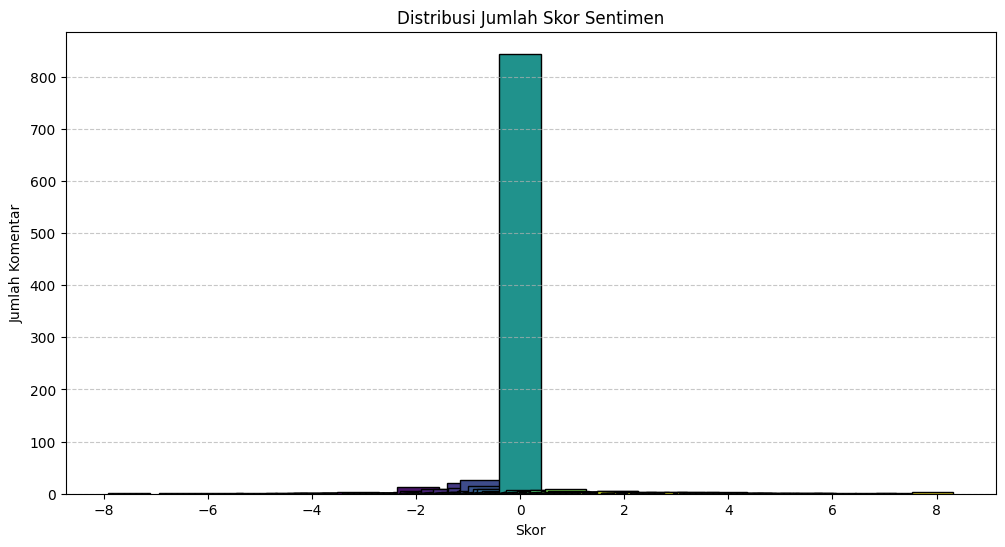

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pastikan pakai df_scores, bukan df
# Menghitung jumlah masing-masing skor unik
score_counts = df['Score'].value_counts().sort_index()

# Menghasilkan warna acak
colors = plt.cm.viridis(np.linspace(0, 1, len(score_counts)))

# Plot barplot dengan warna acak
plt.figure(figsize=(12, 6))

plt.bar(score_counts.index, score_counts.values, color=colors, edgecolor='black')

plt.title('Distribusi Jumlah Skor Sentimen')
plt.xlabel('Skor')
plt.ylabel('Jumlah Komentar')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

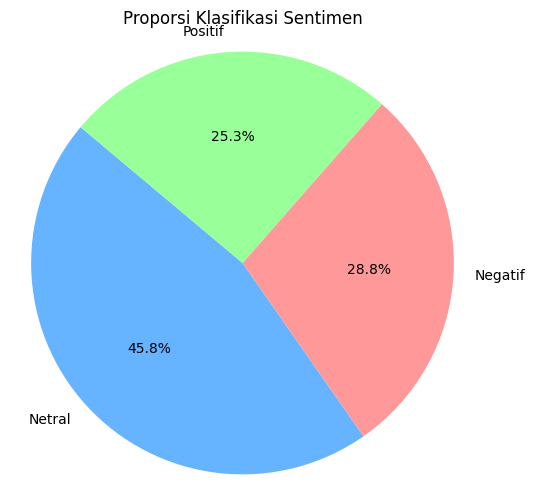

In [ ]:
import matplotlib.pyplot as plt

# Pakai df_scores yang sudah ada hasil sentimennya
classification_counts = df['Sentimen'].value_counts()

# Buat pie chart dengan persentase
plt.figure(figsize=(6, 6))
plt.pie(
    classification_counts,
    labels=classification_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#ff9999', '#99ff99']
)
plt.axis('equal')
plt.title('Proporsi Klasifikasi Sentimen')
plt.show()


In [ ]:
# Load Data Validasi Pakar
validated_test_path = '/content/drive/MyDrive/SKRIPSI/BARU/Data Test 20%.xlsx'
df_test_validated = pd.read_excel(validated_test_path)

# # Hapus kolom 'Sentimen' dan 'Clean_text' jika ada
# columns_to_drop = ['Sentimen', 'Clean_text']
# df_test_validated = df_test_validated.drop(columns=[col for col in columns_to_drop if col in df_test_validated.columns], axis=1)

# Ubah nama kolom 'Validasi_Sentimen' menjadi 'Sentimen' jika kolom tersebut ada
if 'Validasi_Sentimen' in df_test_validated.columns:
    df_test_validated.rename(columns={'Validasi_Sentimen': 'Sentimen'}, inplace=True)

# Atur ulang urutan kolom sesuai kebutuhan
target_columns = ['No', 'username', 'full_text', 'Score', 'Sentimen']
df_test_validated = df_test_validated[[col for col in target_columns if col in df_test_validated.columns]]

# Tampilkan hasil
print(df_test_validated.head())

                                           full_text Sentimen
0  kl listrik rumah watt arti nyangkut listrik rumah   Netral
1                        kl pakai powerbank bs tidak   Netral
2  mending cuan berani ambil resiko kalau akalin ...  Positif
3                                              dapat   Netral
4  tidak boros tapi habis nungguin gitu untuk jal...  Negatif


# **MODELLING**

In [ ]:
print(df_train['Sentimen'].value_counts())
print(df_test_validated['Sentimen'].value_counts())

Sentimen
Netral     743
Negatif    468
Positif    411
Name: count, dtype: int64
Sentimen
Netral     186
Negatif    117
Positif    103
Name: count, dtype: int64


In [ ]:
df

,full_text,username,Score,Sentimen
0,cuan cuan pakai benerin lingkungan,Marrlz | 𝕸𝖎𝖈𝖈,0.983624,Positif
1,saya tinggal halmahera,BG aris,0.000000,Netral
2,anjay daerah saya,blum ada bulu,0.000000,Netral
3,saya lingkungan pada cuan,zan ART⚡,0.123119,Positif
4,saya pilih lingkungan,marvel,-1.311056,Negatif
...,...,...,...,...
2023,orang kalau sisi kalau sisi untung rugi,irmatsamdo,0.000000,Netral
2024,purna jual ancur,wadi 76,0.000000,Netral
2025,nunggu mobil bahan bakar nuklir,Beno,0.961727,Positif
2026,ganti biar polusi jalan hilang tidak suka mobi...,Amsir,0.000000,Netral


### LOGREG & SVM PAKAR

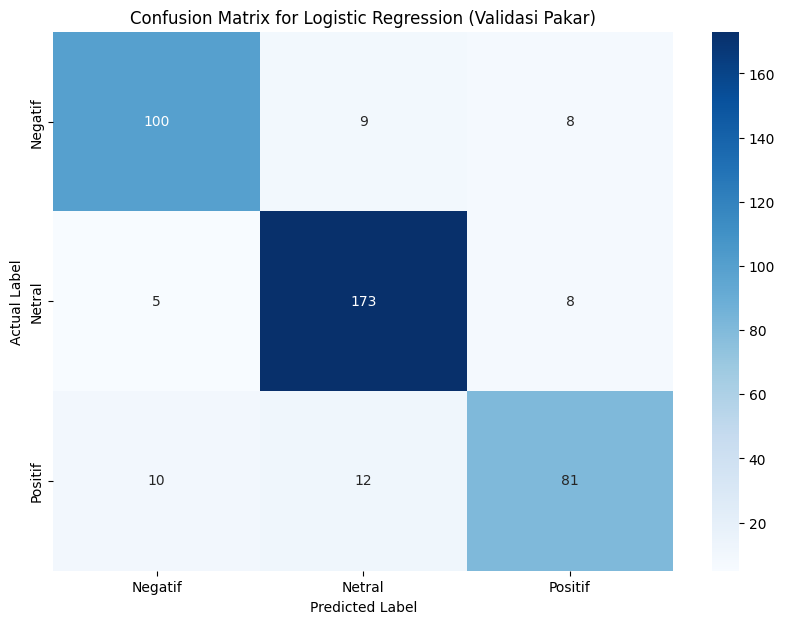

=== Logistic Regression (Validasi Pakar) ===
              precision    recall  f1-score   support

     Negatif       0.87      0.85      0.86       117
      Netral       0.89      0.93      0.91       186
     Positif       0.84      0.79      0.81       103

    accuracy                           0.87       406
   macro avg       0.87      0.86      0.86       406
weighted avg       0.87      0.87      0.87       406

Accuracy Logistic Regression (Validasi Pakar): 87.19%
Label: Negatif
True Positives (TP): 100
True Negatives (TN): 274
False Positives (FP): 15
False Negatives (FN): 17

Label: Netral
True Positives (TP): 173
True Negatives (TN): 199
False Positives (FP): 21
False Negatives (FN): 13

Label: Positif
True Positives (TP): 81
True Negatives (TN): 287
False Positives (FP): 16
False Negatives (FN): 22



In [ ]:
# Chi-square

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Matikan warning agar output lebih rapi
warnings.filterwarnings("ignore")

# Preprocessing data latih
df_train['full_text'].fillna('', inplace=True)
df_train['full_text'] = df_train['full_text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)

# Preprocessing data validasi pakar
df_test_validated['full_text'].fillna('', inplace=True)
df_test_validated['full_text'] = df_test_validated['full_text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)

# Vectorization
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['full_text'])
X_test = vectorizer.transform(df_test_validated['full_text'])

# Seleksi fitur dengan Chi-Square
selector = SelectKBest(chi2, k=min(80, X_train.shape[1]))
X_train_selected = selector.fit_transform(X_train, df_train['Sentimen'])
X_test_selected = selector.transform(X_test)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['Sentimen'])
y_test_encoded = label_encoder.transform(df_test_validated['Sentimen'])

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_selected, y_train_encoded)

# Prediksi pada data validasi pakar
y_pred_logreg = logreg.predict(X_test_selected)

# Confusion matrix
conf_matrix_logreg = confusion_matrix(y_test_encoded, y_pred_logreg)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression (Validasi Pakar)')
plt.show()

# Evaluasi hasil model dengan classification report
print("=== Logistic Regression (Validasi Pakar) ===")
print(classification_report(y_test_encoded, y_pred_logreg, target_names=label_encoder.classes_, zero_division=1))

# Akurasi pada data validasi pakar
accuracy_logreg = accuracy_score(y_test_encoded, y_pred_logreg)
print(f"Accuracy Logistic Regression (Validasi Pakar): \033[1m{accuracy_logreg:.2%}\033[0m")

# ANALISIS TP, TN, FP, FN
labels = label_encoder.classes_
results_logreg = {}

for i, label in enumerate(labels):
    TP = conf_matrix_logreg[i, i]  # True Positives
    TN = np.sum(np.delete(np.delete(conf_matrix_logreg, i, axis=0), i, axis=1))  # True Negatives
    FP = np.sum(conf_matrix_logreg[:, i]) - TP  # False Positives
    FN = np.sum(conf_matrix_logreg[i, :]) - TP  # False Negatives
    results_logreg[label] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Print hasil per label
def bold_print(value):
    return '\033[1m' + str(value) + '\033[0m'

for label, metrics in results_logreg.items():
    print(f"Label: {label}")
    print("True Positives (TP):", bold_print(metrics['TP']))
    print("True Negatives (TN):", bold_print(metrics['TN']))
    print("False Positives (FP):", bold_print(metrics['FP']))
    print("False Negatives (FN):", bold_print(metrics['FN']))
    print()

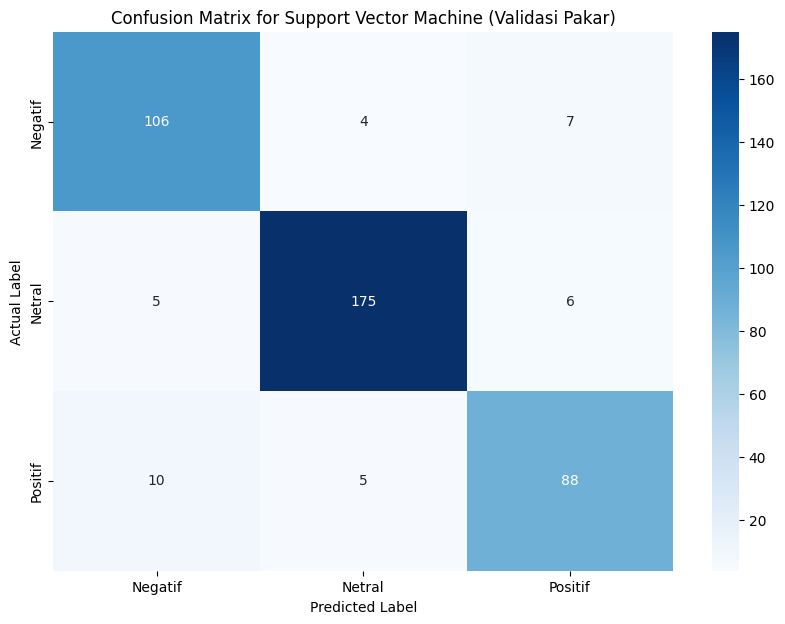

=== Support Vector Machine (Validasi Pakar) ===
              precision    recall  f1-score   support

     Negatif       0.88      0.91      0.89       117
      Netral       0.95      0.94      0.95       186
     Positif       0.87      0.85      0.86       103

    accuracy                           0.91       406
   macro avg       0.90      0.90      0.90       406
weighted avg       0.91      0.91      0.91       406

Accuracy Support Vector Machine (Validasi Pakar): 90.89%
Label: Negatif
True Positives (TP): 106
True Negatives (TN): 274
False Positives (FP): 15
False Negatives (FN): 11

Label: Netral
True Positives (TP): 175
True Negatives (TN): 211
False Positives (FP): 9
False Negatives (FN): 11

Label: Positif
True Positives (TP): 88
True Negatives (TN): 290
False Positives (FP): 13
False Negatives (FN): 15



In [ ]:
# Chi-square

import warnings
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Matikan warning agar output lebih rapi
warnings.filterwarnings("ignore")

# Preprocessing data latih
df_train['full_text'].fillna('', inplace=True)
df_train['full_text'] = df_train['full_text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)

# Preprocessing data validasi pakar
df_test_validated['full_text'].fillna('', inplace=True)
df_test_validated['full_text'] = df_test_validated['full_text'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) and x.startswith('[') else x)

# Vectorization
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['full_text'])
X_test = vectorizer.transform(df_test_validated['full_text'])

# Seleksi fitur dengan jumlah yang konsisten
selector = SelectKBest(chi2, k=min(255, X_train.shape[1]))
X_train_selected = selector.fit_transform(X_train, df_train['Sentimen'])
X_test_selected = selector.transform(X_test)

# Label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['Sentimen'])
y_test_encoded = label_encoder.transform(df_test_validated['Sentimen'])

# Support Vector Machine (Linear Kernel)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train_selected, y_train_encoded)

# Prediksi pada data validasi pakar
y_pred = svm.predict(X_test_selected)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Support Vector Machine (Validasi Pakar)')
plt.show()

# Evaluasi hasil model dengan classification report
print("=== Support Vector Machine (Validasi Pakar) ===")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_, zero_division=1))

# Akurasi pada data validasi pakar
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy Support Vector Machine (Validasi Pakar): \033[1m{accuracy:.2%}\033[0m")

# ANALISIS TP, TN, FP, FN
labels = label_encoder.classes_
results_svm = {}

for i, label in enumerate(labels):
    TP = conf_matrix[i, i]  # True Positives
    TN = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))  # True Negatives
    FP = np.sum(conf_matrix[:, i]) - TP  # False Positives
    FN = np.sum(conf_matrix[i, :]) - TP  # False Negatives
    results_svm[label] = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

# Print hasil per label
def bold_print(value):
    return '\033[1m' + str(value) + '\033[0m'

for label, metrics in results_svm.items():
    print(f"Label: {label}")
    print("True Positives (TP):", bold_print(metrics['TP']))
    print("True Negatives (TN):", bold_print(metrics['TN']))
    print("False Positives (FP):", bold_print(metrics['FP']))
    print("False Negatives (FN):", bold_print(metrics['FN']))
    print()